In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.nn import functional as F

In [26]:
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0.0], [0.0], [1.0]])

In [27]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x)) # y_pred是个概率值
        return y_pred
model = LogisticRegressionModel()


In [28]:
model

LogisticRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [29]:
# 损失函数
# size_average:是否求均值
loss = nn.BCELoss(size_average = False)
loss

D:\anconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


BCELoss()

In [30]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [31]:
epoch_list = []
loss_list = []
for epoch in range(8000):
    y_pred = model(x_data)
    l = loss(y_pred,        )
    loss_list.append(l)
    epoch_list.append(epoch)
    print('Epoch = ', epoch, 'loss = ', l.item())
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

D:\anconda3\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch =  0 loss =  2.328371047973633
Epoch =  1 loss =  2.316767692565918
Epoch =  2 loss =  2.3058857917785645
Epoch =  3 loss =  2.295673131942749
Epoch =  4 loss =  2.286080837249756
Epoch =  5 loss =  2.2770628929138184
Epoch =  6 loss =  2.2685775756835938
Epoch =  7 loss =  2.2605836391448975
Epoch =  8 loss =  2.253045082092285
Epoch =  9 loss =  2.245926856994629
Epoch =  10 loss =  2.239196538925171
Epoch =  11 loss =  2.2328248023986816
Epoch =  12 loss =  2.2267839908599854
Epoch =  13 loss =  2.221047878265381
Epoch =  14 loss =  2.2155933380126953
Epoch =  15 loss =  2.2103981971740723
Epoch =  16 loss =  2.205441951751709
Epoch =  17 loss =  2.2007064819335938
Epoch =  18 loss =  2.196174144744873
Epoch =  19 loss =  2.191828727722168
Epoch =  20 loss =  2.1876564025878906
Epoch =  21 loss =  2.183642625808716
Epoch =  22 loss =  2.1797752380371094
Epoch =  23 loss =  2.1760430335998535
Epoch =  24 loss =  2.1724352836608887
Epoch =  25 loss =  2.168942451477051
Epoch =  

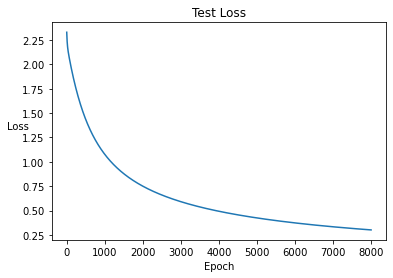

In [32]:
plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss', rotation = 0)
plt.title('Test Loss')
plt.show()